In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import re


In [65]:
def make_plot(results):
    plt.figure(figsize=(10,8))
    
    plt.title(results[0][2])
    
    legend = []
    
    for result in results:
        plt.plot(result[0]['average'])
        legend.append(result[1])
    
    plt.legend(legend)
    plt.xlabel("iterations")
    

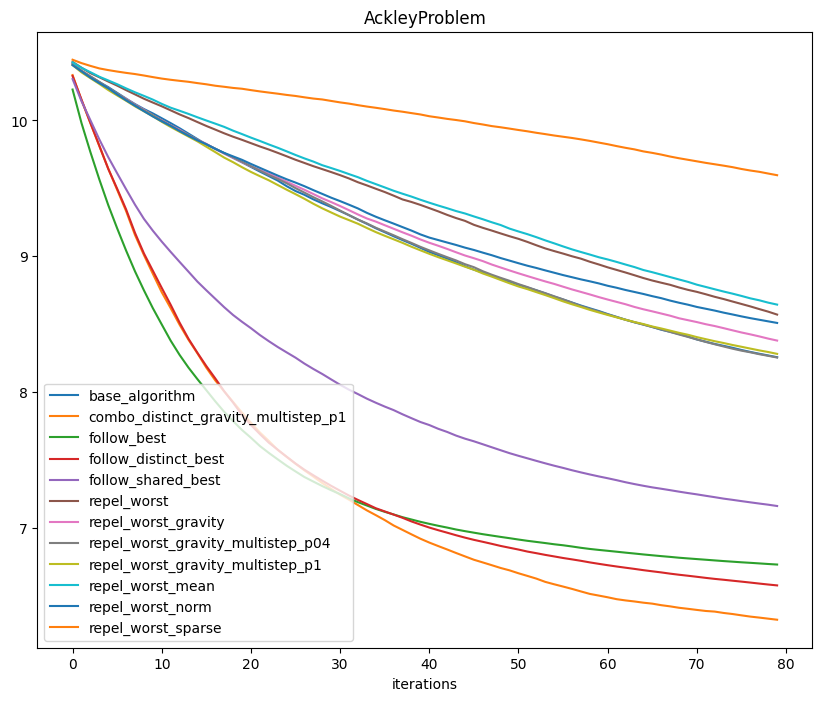

In [78]:
result_files = os.listdir('results')

results = []

for filename in result_files:
    with open(f'results/{filename}','r') as file:
        result = json.loads(file.read())
        
        alg_name = re.search(r'(.*)_[^_]*\.json',filename).group(1)
        
        problem_name = re.search(r'.*_([^_]*)\.json',filename).group(1)
                
        results.append((result, alg_name, problem_name))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])

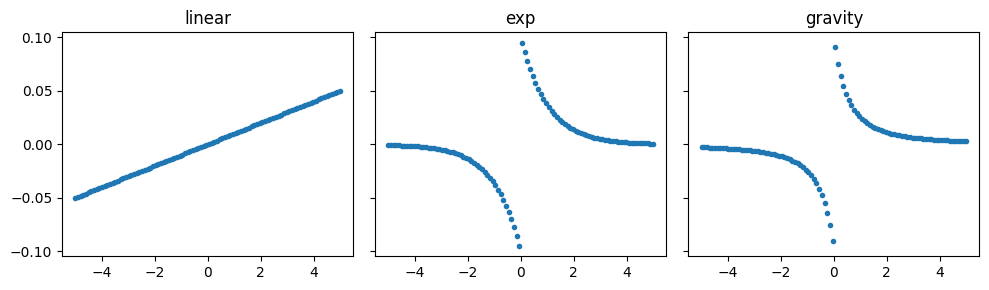

In [67]:
norm_fns = {
    "linear": lambda x: 0.01 * x,
    "exp": lambda x: 0.1 * np.sign(x) * np.exp(-np.abs(x)),
    "gravity": lambda x: 0.1 * np.sign(x) * np.power(np.abs(x) + 1, -2),
}

x = np.linspace(-5, 5, 100)

f, ax = plt.subplots(1, len(norm_fns), figsize=(10,3), sharey=True)
for ax, (name, fn) in zip(ax.flatten(), norm_fns.items()):
    ax.plot(x, fn(x), ".")
    ax.set_title(name)

plt.tight_layout()